# Lernmodul zur Verarbeitung und Analyse von Textdaten

Die Verarbeitung von menschlicher Sprache (Natural Language Processing, NLP) gilt als Voraussetzung für eine erfolgreiche Mensch-Maschine-Kommunikation. Zusätzlich kann sie dabei helfen eine vom Mensch unternommene Textanalyse zu unterstützen. Handelt es sich bei diesem Kommentar um unerwünschte Inhalte, verbreitet dieser Beitrag Falschinformationen und welche Meinung will der Verfasser mit dieser Rezension zum Ausdruck bringen.

Im folgenden Lernmodul sollen mithilfe computergestützter Methoden eine Antwort auf solche Problemstellungen gefunden werden. Im Zuge der Sentiment Analysis wird versucht die Intention hinter einem Textbeitrag zu quantifizieren um bspw. zwischen einer positiven und einer negativen Aussage zu unterscheiden. Bevor aber ein Modell (hier: Klassifikator) eine Vorhersage (hier: Stimmung) über die verfügbaren Daten (hier: Textbeiträge) treffen kann, müssen diese vorbereitet werden. Das folgende Modul spielt diese Vorbereitung einmal mithilfe eines Jupyter Notebook, der Programmiersprache Python und unterstützenden Bibliotheken durch.

**Übersicht über die Lerninhalte:**

1. [Einführung](#einführung)
    1. [Motivation](#motivation)
    2. [Voraussetzungen](#voraussetzungen)
2. [Daten](#daten)
    1. [Textdaten beschaffen](#beschaffen)
    2. [Textdaten erkunden](#erkunden)
    3. [Textdaten aufbereiten](#aufbereiten)
        1. [Zeichen bereinigen](#zeichen-bereinigen)
        2. [Wörter bereinigen](#wörter-bereinigen)
        3. [Tweets bereinigen](#tweets-bereinigen)
3. [Modell](#modell)
    1. [Textdaten einbetten](#einbetten)
    2. [Textdaten klassifizieren](#klassifizieren)
        1. [Überwachte Klassifikation](#überwachte-klassifikation)
        2. [Unüberwachte Klassifikation](#unüberwachte-klassifikation)
4. [Verwendung](#verwendung)
5. [Abschluss](#abschluss)

**Lernziele:**

Die Teilnehmer lernen Textdaten in roher Form Schritt für Schritt in kontextbezogene Daten für eine Textanalyse zu transformieren. Dies geschieht in der Datendomäne. Daraufhin bewegen sich die Teilnehmer in der Modelldomäne, in der sie die Daten in das Modell einbetten und sie vom Modell klassifizieren lassen.

**Voraussetzungen:**

- [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas)

**Setup für die Aufgabenüberprüfung:**

In [1]:
from taskreview.learningModule import LearningModule
texte_lm = LearningModule('data/lernmodul_texte.db')

<div style="background-color: #150458; padding: 5px;"></div>

## 1. <a id='einführung'>Einführung</a>

### 1.1 <a id='motivation'>Motivation</a>

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von der Bild- auf die Textebene, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analysis)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Dieses Lernmodul beschäftigt sich mit der ersten Problemstellung, also der Texterkennung, im besonderen mit der Unterscheidung zwischen verschiedenen Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten sind und erkannt werden müssen. Aber auch ein aktuelles Stimmungsbild der Gesellschaft kann in Krisenzeiten über kürzlich verfasste Beiträge auf Twitter geschaffen werden.

### 1.2 <a id='voraussetzungen'>Voraussetzungen</a>

Dieses Lernmodul nimmt sich [NumPy](https://numpy.org/) für numerische Berechnungen, [Pandas](https://pandas.pydata.org/) zur Datenverarbeitung und [PyPlot](https://matplotlib.org/api/pyplot_api.html) zur Datenvisualisierung zur Hilfe. Die folgende Zelle importiert benötigte Abhängigkeiten:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div style="background-color: #150458; padding: 5px;"></div>

## 2. <a id='daten'>Daten</a>

In der Datendomäne beschaffen wir uns zunächst einen Datensatz, welcher aus vielen Beispielen besteht, der die Grundgesamtheit an Daten bildet. Ein Beispiel umfasst dabei mindestens ein, wenn nicht sogar mehrere Merkmale. Ein Merkmal wird dabei durch einen numerischen oder symbolischen Wert verkörpert, der in unserem Fall bspw. ein Text sein kann.

Im späteren Verlauf werden wir von der Daten- in die Modelldomäne voranschreiten. Hier werden einzelne Merkmale verworfen, andere wiederum für eine Modellvorhersage herangezogen. Mehr dazu im Abschnitt 3, denn zunächst beschaffen wir uns die Daten...

### 2.1 <a id='beschaffen'>Textdaten beschaffen</a>

Wo findet man in der heutigen Zeit aktuelle Daten, welche eine eigene Meinung enthalten? Auf dem Kurznachrichtendienst Twitter. Und genau von dort stammt das ZIP-Archiv `tweets.json.zip`, welches wir im folgenden mithilfe von Pandas einlesen und im DataFrame `twitter` hinterlegen.

In [3]:
twitter = pd.read_json('./tweets.json.gz', compression='gzip')

### 2.2 <a id='erkunden'>Textdaten erkunden</a>

Wie im [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas) kennengelernt, lässt sich über die `head()` Funktionalität der Kopf des Datensatzes betrachten. Wie schaut dieser aus?

In [4]:
twitter.head()

,twista,type,id,user,created_at,recorded_at,source,retweets,favourites,lang,...,screen_name,location,description,url,verified,followers,friends,listed,statuses,refers_to
0,0.3.1-b,status,1212046141279354880,1.140992e+18,2019-12-31 16:21:33+00:00,2019-12-31 16:21:39.286956+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3.1-b,status,1212046145645662208,7.137519e+17,2019-12-31 16:21:34+00:00,2019-12-31 16:21:39.657847+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3.1-b,status,1212046145737961472,7.158583e+17,2019-12-31 16:21:34+00:00,2019-12-31 16:21:39.700276+00:00,"<a href=""http://www.facebook.com/twitter"" rel=...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3.1-b,status,1211821086905683968,1.106642e+18,2019-12-31 01:27:16+00:00,2019-12-31 16:21:40.016141+00:00,"<a href=""http://twitter.com/download/iphone"" r...",1582.0,4518,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3.1-b,status,1212046149990916096,9.990299e+08,2019-12-31 16:21:35+00:00,2019-12-31 16:21:40.711065+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Leider liefert die `head()` Funktionalität nicht die Größe des Datensatzes zurück. Wie viele Beispiele sind in ihm enthalten?

In [5]:
twitter.shape[0]

50000

50.000 Beispiele sind uns ein paar zu viel. Wir machen mit lediglich 100 Beispielen weiter.

In [6]:
twitter = twitter[:100]

Wie viele Werte liegen insgesamt vor?

In [7]:
twitter.size

2600

Wie viele Werte liegen pro Beispiel vor? Aus wie vielen Merkmalen besteht der Datensatz?

In [8]:
twitter.shape[1]

26

26 Merkmale klingt kompliziert. Mal sehen, wie sie heißen...

In [9]:
twitter.columns

Index(['twista', 'type', 'id', 'user', 'created_at', 'recorded_at', 'source',
       'retweets', 'favourites', 'lang', 'hashtags', 'urls', 'mentions',
       'mentioned_ids', 'text', 'name', 'screen_name', 'location',
       'description', 'url', 'verified', 'followers', 'friends', 'listed',
       'statuses', 'refers_to'],
      dtype='object')

Das Merkmal _lang_ schauen wir uns als Erstes an. Welche Sprachen sind vertreten?

In [10]:
twitter['lang'].unique()

array(['de', 'en', 'tr', 'pt', 'es'], dtype=object)

Wir behalten lediglich die deutschen Inhalte...

In [11]:
twitter = twitter.drop(twitter[twitter.lang != 'de'].index).reset_index(drop=True)

Das Merkmal _text_ scheint die gewünschten Tweets zu enthalten. Wir überführen dieses Merkmal vom DataFrame `twitter` in eine DataSeries `tweets`.

In [12]:
tweets = twitter['text']
tweets.head()

0    Hahaha.., da haben "die Nazis" aber Glück 🍀 ge...
1    Ich wünsche allen guten Menschen ein gesundes ...
2    Wir wünschen euch einen guten Rutsch und für d...
3    31.12.2019. Breitscheidplatz. Weihnachtsmarkt....
4    Wir wünschen allen ein friedliches  und sorgen...
Name: text, dtype: object

### 2.3 <a id='aufbereiten'>Textdaten aufbereiten</a>

#### 2.3.1 <a id='zeichen-bereinigen'>Zeichen bereinigen</a>

Schauen wir uns das erste Beispiel an. Was fällt auf?

In [13]:
tweets[0]

'Hahaha.., da haben "die Nazis" aber Glück 🍀 gehabt und was für ein Glück. Hust.. \n\nWelcher Mann bitteschön, würde denn mit "DER".., na Ihr wisst schon..😂😛 https://t.co/a749iauM9U'

Genau, der Tweet enthält allerhand Sonderzeichen, Emojis und sogar eine URL. Daher werden wir als nächstes alle Symbole entfernen, die weder dem Alphabet angehören, noch Ziffern sind...

In [14]:
tweets = tweets.replace(regex={'[^a-zA-ZäöüßÄÖU\s]' : ''})
tweets[0]

'Hahaha da haben die Nazis aber Glück  gehabt und was für ein Glück Hust \n\nWelcher Mann bitteschön würde denn mit DER na Ihr wisst schon httpstcoaiauMU'

#### 2.3.2 <a id='wörter-bereinigen'>Wörter bereinigen</a>

Aus Sätzen werden Wörter. Wir zerteilen jeden Tweet anhand des Leerzeichens und erhalten eine Liste von Wörtern pro Tweet.

In [15]:
tweets = tweets.str.split()
tweets.head()

0    [Hahaha, da, haben, die, Nazis, aber, Glück, g...
1    [Ich, wünsche, allen, guten, Menschen, ein, ge...
2    [Wir, wünschen, euch, einen, guten, Rutsch, un...
3    [Breitscheidplatz, Weihnachtsmarkt, Aus, den, ...
4    [Wir, wünschen, allen, ein, friedliches, und, ...
Name: text, dtype: object

Nun da wir die einzelnen Wörter getrennt haben, fassen wir alle Wörter aus jedem Tweet zu einer großen Sammlung zusammen.

In [16]:
def aggregate_words(tweets):
    """Aggregate words from tweets"""
    
    all_words = []
    for sentence in tweets:
        for word in sentence:
            all_words.append(word)
    return all_words

In [17]:
all_words = aggregate_words(tweets) # List
# all_words = tweets.aggregate(np.concatenate) # NumPy array

Nachdem wir alle Wörter beisammen haben, interessieren uns die beliebtesten Wörter. An dieser Stelle greifen wir zum ersten mal auf das Natural Language Toolkit ([NLTK](https://www.nltk.org/)) zurück, welches eine Häufigkeitsverteilung über die [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist) Funktionalität implementiert.

In [18]:
from nltk.probability import FreqDist
fd = FreqDist(all_words)

Wie lauten also die zehn häufigsten Wörter

In [19]:
fd.most_common(10)

[('und', 42),
 ('die', 40),
 ('ein', 30),
 ('der', 22),
 ('in', 21),
 ('Ich', 20),
 ('Jahr', 18),
 ('für', 17),
 ('den', 16),
 ('an', 16)]

Und wie sieht deren Häufigkeitsverteilung aus?

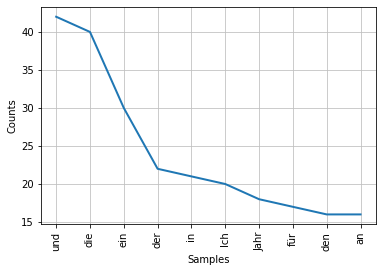

In [20]:
fd.plot(10)

Denken wir an unsere Problemstellung der Stimmungsanalyse scheinen Verbindungswörter wie _und_ bzw. Artikel wie _der_, _die_, _das_ nicht hilfreich zu sein. Daher wollen wir sie als sog. Stopp-Wörter, also Wörter, die den Lesefluss stören, entfernen. Die folgende Liste sollte zu Beginn ausreichen:

In [21]:
stop_words = ['und', 'oder', 'der', 'die', 'das', 'er', 'sie', 'es', 'ein', 'eine', 'ich', 'du', 'wir', 'ihr']

Wie viel Prozent unseres Datensatzes würden wir wohl verlieren, wenn wir die Stopp-Wörter entfernen?

In [22]:
def content_loss(text):
    content = [word for word in text if word not in stop_words]
    return 1.0 - len(content) / len(text)

In [23]:
content_loss(all_words)

0.10903260288615713

10 % Verlust klingt verkraftbar. Dann werfen wir den Filter mal an.

In [24]:
def filter_tokens(tweets):
    """Filter tokens in tweets"""
    
    row_list = []
    for row in tweets:
        token_list = []
        for token in row:
            if token not in stop_words:
                token_list.append(token)
        row_list.append(token_list)
    
    return pd.Series(row_list)

In [25]:
tweets = filter_tokens(tweets) # Python list

Damit muss unsere Sammlung von Wörtern aktualisiert werden. Der Einfachheit sammeln wir sie erneut aus den von Stopp-Wörtern bereinigten Tweets.

In [26]:
all_words = aggregate_words(tweets) # List
# all_words = tweets.aggregate(np.concatenate) # NumPy array

Rufen wir die Verlustfunktion erneut auf, meldet sie wie erwartet keine Verluste.

In [27]:
content_loss(all_words)

0.0

Wie sehen jetzt die häufigsten Wörter aus? Alternativ zur Häufigkeitsverteilung lassen sich Schlagwortwolken aus den Wörtern erstellen. Dazu nutzen wir die Funktionalität von [WordCloud](http://amueller.github.io/word_cloud/index.html).

In [28]:
from wordcloud import WordCloud
wc = WordCloud()

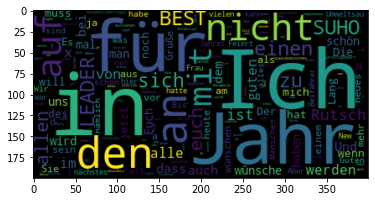

In [29]:
plt.imshow(wc.generate_from_frequencies(FreqDist(all_words)), interpolation="bilinear")
plt.show()

#### 2.3.3 <a id='tweets-bereinigen'>Tweets bereinigen</a>

Nun wollen wir nicht nur einzelne Wörter, sondern sogar ganze Tweets entfernen. Dies ist nötig, wenn sie bspw. zu wenig oder zu viele Wörter für eine Analyse enthalten. Daher interessiert uns im folgenden die Länge eines Tweets. Wie viele Wörter besitzt der kürzeste Tweet?

In [30]:
tweets_length = [len(tweet) for tweet in tweets]
np.min(tweets_length)

3

Hoffentlich handelt es sich um einen Ausreißer. Wir benötigen wiederum eine Häufigkeitsverteilung. Dieses Mal aber als einfaches Histogramm wie folgt:

In [31]:
def plot_tweet_length_distribution(tweets_length):
    """Count tokens per tweet and plot their length distribution."""

    plt.hist(tweets_length, np.max(tweets_length))
    plt.xlabel('Words per tweet')
    plt.ylabel('Amount of tweets')
    plt.title('Tweet length distribution')
    plt.show()

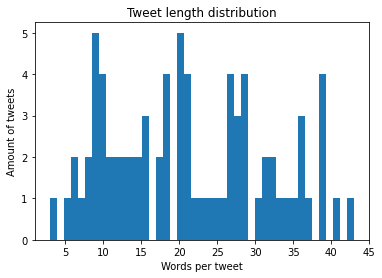

In [32]:
plot_tweet_length_distribution(tweets_length)

Wir verwerfen alle Tweets, die weniger als 10 Wörter groß sind.

In [33]:
def drop_tweets(tweets):
    """Drop tweets"""
    
    row_list = []
    for row in tweets:
        if len(row) > 9:
            row_list.append(row)
    
    return pd.Series(row_list)

In [34]:
tweets = drop_tweets(tweets)
tweets.size

66

Von den ursprünglich 100 Tweets sind nach unserer Datenaufbereitung lediglich 66 übrig geblieben. Ein guter Zeitpunkt um zur Modelldomäne überzugehen und etwas mit den bereinigten Daten anzustellen.

## 3. <a id='modell'>Modell</a>

### 3.1 <a id='einbetten'>Textdaten einbetten</a>

#### 3.1.1 Vokabular

In [35]:
positive = pd.read_csv('./positive.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Score', 'Declination'])
positive['Stimmung'] = 'positiv'

negative = pd.read_csv('./negative.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Score', 'Declination'])
negative['Stimmung'] = 'negativ'

vocab = pd.concat([negative, positive])
assert positive.size + negative.size == vocab.size
vocab.head()

,Wort,Score,Declination,Stimmung
0,Abbruch|NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",negativ
1,Abdankung|NN,-0.0048,Abdankungen,negativ
2,Abdämpfung|NN,-0.0048,Abdämpfungen,negativ
3,Abfall|NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",negativ
4,Abfuhr|NN,-0.3367,Abfuhren,negativ


Als Nächstes werden wir den Zusatz hinter dem senkrechten Strich (|) vom Wort lösen.

In [36]:
vocab[['Wort', 'Typ']] = vocab['Wort'].str.split('|', 1, expand=True)
vocab.head()

,Wort,Score,Declination,Stimmung,Typ
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",negativ,NN
1,Abdankung,-0.0048,Abdankungen,negativ,NN
2,Abdämpfung,-0.0048,Abdämpfungen,negativ,NN
3,Abfall,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",negativ,NN
4,Abfuhr,-0.3367,Abfuhren,negativ,NN


Fehlende Werte werden mit einer leeren Zeichenkette ersetzt.

In [37]:
vocab = vocab.fillna('')

Als Nächstes werden die Deklinationen eines Wortes als eigenes Wort hinterlegt.

In [38]:
vocab['Merged'] = vocab['Wort'] + ',' + vocab['Declination']
vocab['Merged'] = vocab['Merged'].str.split(',')
vocab = vocab.explode('Merged')
vocab = vocab.sort_values('Wort').reset_index(drop=True)
vocab = vocab.rename(columns={'Wort': 'Stamm', 'Merged': 'Wort'})
vocab = vocab.drop(['Declination'], axis=1)
vocab

,Stamm,Score,Stimmung,Typ,Wort
0,Abbruch,-0.0048,negativ,NN,Abbruch
1,Abbruch,-0.0048,negativ,NN,Abbruches
2,Abbruch,-0.0048,negativ,NN,Abbrüche
3,Abbruch,-0.0048,negativ,NN,Abbruchs
4,Abbruch,-0.0048,negativ,NN,Abbrüchen
...,...,...,...,...,...
32076,üppig,0.2010,positiv,ADJX,üppigster
32077,üppig,0.2010,positiv,ADJX,üppiges
32078,üppig,0.2010,positiv,ADJX,üppig
32079,üppig,0.2010,positiv,ADJX,üppigsten


Welche Wort-Typen sind vorhanden?

In [39]:
vocab.groupby('Typ').count()

,Stamm,Score,Stimmung,Wort
Typ,,,,
ADJX,22960,22960,22960,22960
ADV,37,37,37,37
NN,3182,3182,3182,3182
VVINF,5902,5902,5902,5902


Finde das Adjektiv _gut_ im Vokabular.

In [40]:
vocab.loc[vocab['Wort'] == 'gut']

,Stamm,Score,Stimmung,Typ,Wort
13862,gut,0.3716,positiv,ADJX,gut


Finde die ersten zehn Adverben im Vokabular.

In [41]:
vocab.loc[vocab['Typ'] == 'ADV'][:10]

,Stamm,Score,Stimmung,Typ,Wort
4786,aufwärts,0.0040,positiv,ADV,aufwärts
4787,aufwärts,0.0040,positiv,ADV,
6330,bergab,-0.0048,negativ,ADV,
6331,bergab,-0.0048,negativ,ADV,bergab
6603,besonders,0.5391,positiv,ADV,
6604,besonders,0.5391,positiv,ADV,besonders
6689,bestens,0.0808,positiv,ADV,
6690,bestens,0.0808,positiv,ADV,bestens
14558,herunter,-0.0048,negativ,ADV,herunter
14559,herunter,-0.0048,negativ,ADV,


In [42]:
corpus = {'negativ' : vocab.loc[vocab['Stimmung'] == 'negativ'], 'positiv' : vocab.loc[vocab['Stimmung'] == 'positiv']}

#### 3.1.2 Labels

In [43]:
def get_labels(sequence):
    score = 0.0
    for token in sequence:
        row = vocab.loc[vocab['Wort'] == token]
        if len(row) == 1:
            score += row['Score'].to_numpy()
    if score > 0.0:
        return 'positiv'
    elif score < 0.0:
        return 'negativ'
    else:
        return 'neutral'

#### 3.1.3 Features

In [44]:
def word_feats(words):
    return dict([(word, True) for word in words])

In [45]:
negative_features = [(word_feats(vocab.loc[vocab['Stimmung'] == 'negativ']['Wort']), 'negativ')]
positive_features = [(word_feats(vocab.loc[vocab['Stimmung'] == 'positiv']['Wort']), 'positiv')]
train_set = negative_features + positive_features

#### 3.1.4 Vektorisierung

In [46]:
def vectorize(tweets):
    """Vectorize tweets based on vocabulary"""
    
    rows = []
    for row in tweets:
        
        tokens = []
        for token in row:
            
            temp_row = vocab.loc[vocab['Wort'] == token]
            if len(temp_row) == 1:
                tokens.append(temp_row['Score'].to_numpy()[0])
            
        rows.append(tokens)

    return pd.Series(rows)

In [47]:
vectors = vectorize(tweets)

In [48]:
vectors.head()

0                                    [0.2452, 0.2452]
1                      [0.3716, 0.1554, 0.115, 0.004]
2    [0.3716, -0.0048, 0.004, -0.0048, 0.494, 0.0081]
3                                           [-0.0048]
4                                     [0.0924, 0.004]
dtype: object

In [49]:
_size = 4
def pad(vectors):
    """Pad vectors with zeros at the end."""
    
    rows = []
    for row in vectors:
        tokens = np.pad(row[:_size], (0, _size-len(row[:_size])))
        rows.append(tokens)
        
    return pd.Series(rows)

In [50]:
padded = pad(vectors)
padded.head()

0           [0.2452, 0.2452, 0.0, 0.0]
1       [0.3716, 0.1554, 0.115, 0.004]
2    [0.3716, -0.0048, 0.004, -0.0048]
3             [-0.0048, 0.0, 0.0, 0.0]
4            [0.0924, 0.004, 0.0, 0.0]
dtype: object

### 3.2 <a id='klassifizieren'>Textdaten klassifizieren</a>

#### 3.2.1 <a id='überwachte-klassifikation'>Überwachte Klassifikation</a>

In [51]:
from nltk import NaiveBayesClassifier

In [52]:
classifier = NaiveBayesClassifier.train(train_set)

#### 3.2.2 <a id='unüberwachte-klassifikation'>Unüberwachte Klassifikation</a>

In [53]:
from nltk.cluster import KMeansClusterer, euclidean_distance

In [54]:
initial_means = [[-1] * _size, [1] * _size]
initial_means
initial_means=initial_means

In [55]:
clusterer = KMeansClusterer(2, euclidean_distance, initial_means=initial_means)

In [56]:
clusters = clusterer.cluster(padded, True)

In [57]:
def plot_clusters():
    """Plot clusters"""
    
    means = clusterer.means()
    plt.plot(means[0], )
    plt.plot(np.array([0] * _size))
    plt.plot(means[1])
    plt.legend(['negativ', 'neutral', 'positiv'])

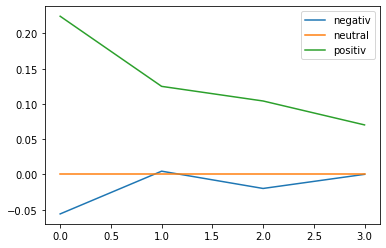

In [58]:
plot_clusters()

In [59]:
def compare_classifier(tweets, examples=100):
    """Compare (un)supervised classifier."""
    
    print('#\tSoll\tÜberw\tUnüberw\t∆\tBeispiel')
    
    tweets = tweets[:examples]
    row = 0
    for example in tweets.iteritems():
        
        tokens = example[1]
        
        # Naive classifier
        naive = get_labels(tokens)
        
        # NLTK classifier
        features = word_feats(tokens)
        nltk = classifier.classify(features)
        
        # Cluster
        vector = padded[row]
        cluster = clusterer.classify(np.pad(vector[:_size], (0, _size-len(vector[:_size]))))
        
        if cluster == 0: cluster = 'positiv'
        else: cluster = 'negativ'
        
        if nltk != cluster: delta = 'X'
        else: delta = ' '
        
        row += 1
        
        print('%i\t%s\t%s\t%s\t%s\t%.160s' % (example[0], naive, nltk, cluster, delta, ' '.join(example[1])))

<div style="background-color: #150458; padding: 5px;"></div>

## 4. <a id='verwendung'>Verwendung</a>

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein schlechtes Lernmodul

In [60]:
classifier.classify(word_feats("Was für ein schlechtes Lernmodul".split()))

'negativ'

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein gutes Lernmodul

In [61]:
classifier.classify(word_feats("Was für ein gutes Lernmodul".split()))

'positiv'

In [62]:
compare_classifier(tweets, examples=100)

#	Soll	Überw	Unüberw	∆	Beispiel
0	positiv	positiv	negativ	X	Hahaha da haben Nazis aber Glück gehabt was für Glück Hust Welcher Mann bitteschön würde denn mit DER na Ihr wisst schon httpstcoaiauMU
1	positiv	positiv	negativ	X	Ich wünsche allen guten Menschen gesundes glückliches Jahr Nur denen aus berzeugung afd wählen denen wünsch richtig Beschissenes Viele Grüße
2	positiv	positiv	negativ	X	Wir wünschen euch einen guten Rutsch für neue Jahr nur Beste Lasst krachen feiert schön jurahannover conticampus leibnizuniversität unihannover hannover hannove
3	negativ	negativ	positiv	X	Breitscheidplatz Weihnachtsmarkt Aus den Stereoboxen erklingt stimmungsschweres FUCK YOU I WONT DO WHAT YOU TELL ME Guten Rutsch
4	positiv	positiv	positiv	 	Wir wünschen allen friedliches sorgenfreies Jahr a git Rosch httpstcojBKdgggOe
5	neutral	positiv	positiv	 	Die Satirepartei Die Partei will KlimaWissenschaftler auf den vorderen Listenplätzen bei Bundestagswahl platzieren Sonneborn httpstcojXPKgEgC
6	positiv	ne

<div style="background-color: #150458; padding: 5px;"></div>

## 5. <a id='abschluss'>Abschluss</a>